In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('../class_cloud/6/2021_11_17__11_00_07_HDR.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use a threshold to detect the sun in the image
_, threshold = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)

# Find the contours of the sun in the image
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding circle with the maximum radius
max_radius = 0
max_x = 0
max_y = 0
for contour in contours:
    points = cv2.convexHull(contour)
    (x, y), radius = cv2.minEnclosingCircle(points)
    if radius > max_radius:
        max_radius = radius
        max_x = x
        max_y = y

# Draw a bounding circle and label over the sun with the maximum radius
cv2.circle(image, (int(max_x), int(max_y)), int(max_radius), (0, 0, 255), 2)
# cv2.putText(image, "Sun blocked by clouds", (int(max_x) - int(max_radius), int(max_y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Save the image with the label and bounding circle applied
# cv2.imwrite('sun_blocked3.jpg', image)


array([[[6, 4, 3],
        [6, 4, 3],
        [6, 4, 3],
        ...,
        [6, 4, 4],
        [6, 4, 4],
        [6, 4, 4]],

       [[6, 4, 3],
        [6, 4, 3],
        [6, 4, 3],
        ...,
        [6, 4, 4],
        [6, 4, 4],
        [6, 4, 4]],

       [[6, 4, 3],
        [6, 4, 3],
        [6, 4, 3],
        ...,
        [6, 4, 4],
        [6, 4, 4],
        [6, 4, 4]],

       ...,

       [[5, 3, 3],
        [5, 3, 3],
        [5, 3, 3],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 3, 3],
        [5, 3, 3],
        [5, 3, 3],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 3, 3],
        [5, 3, 3],
        [5, 3, 3],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8)

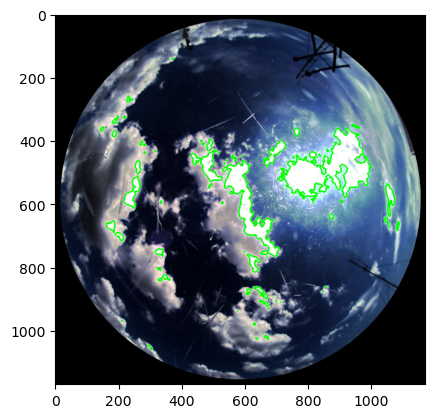

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ./cloud_images/original/2021_11_17__11_00_07_crop.jpg
# ./class_cloud/6/2021_11_17__11_00_07_HDR.jpg
image = cv2.imread('../cloud_images/original2/2021_11_17__12_15_14_crop2.jpg')
r1 = image.shape[1]
r2 = image.shape[0]
mask = np.zeros((r2, r1), dtype=np.uint8)

# Draw a white circle on the image with radius 320
cv2.circle(mask, (int(r1/2), int(r2/2)), int(r2/2), (255, 255, 255), -1, 8, 0)
# Save the image to a file
# cv2.imwrite("mask_test.jpg", image)

masked = cv2.bitwise_and(image, image, mask=mask)


#### Mark sun position
# Convert the image to grayscale
img_mark_sun = masked
gray = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)

# Use a threshold to detect the sun in the image
_, threshold = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

# Find the contours of the sun in the image
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding circle with the maximum radius
max_radius = 0
max_x = 0
max_y = 0
for contour in contours:
    points = cv2.convexHull(contour)
    (x, y), radius = cv2.minEnclosingCircle(points)
    if radius > max_radius:
        max_radius = radius
        max_x = x
        max_y = y

# Draw a bounding circle and label over the sun with the maximum radius
# cv2.circle(img_mark_sun, (int(max_x), int(max_y)), int(max_radius), (0, 0, 255), 2)


#### Find contours
# Convert the image to grayscale
gray = cv2.cvtColor(img_mark_sun, cv2.COLOR_BGR2GRAY)
img_eql = cv2.equalizeHist(gray)
blur = cv2.GaussianBlur(img_eql,(5,5),0)

# Apply a color threshold to create a binary image # T = 240 can detect sun light
_, thresh = cv2.threshold(blur, 240, 255, cv2.THRESH_BINARY)

# Use contour detection to identify the outline of the circle
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(masked, contours, -1, (0, 255, 0), 3)

# crop_mask = cv2.imread('./crop_mask3.png')
# new_img_mask = cv2.bitwise_or(crop_mask,masked)

plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

In [62]:
import cv2

# Create a blank image with a black background
image = np.zeros((600, 600, 3), dtype=np.uint8)

# Draw a circle with radius 50
cv2.circle(image, (300, 300), 50, (255, 255, 255), -1)

# Fill the circle with color red
mask = np.zeros((600+2, 600+2), dtype=np.uint8)
cv2.floodFill(image, mask, (300, 300), (0, 0, 255))

# Count the number of red pixels
red_pixels = cv2.countNonZero(image[:,:,2])

print(f'Number of red pixels in the circle: {red_pixels}')

Number of red pixels in the circle: 7845


In [75]:
import cv2
import numpy as np

# Load the image
image1 = cv2.imread('./cloud_images/original2/2021_11_17__11_00_07_crop.jpg')

# Convert to HSV color space
hsv = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)

# Enhance contrast using histogram equalization
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

# Remove noise using median blur
image = cv2.GaussianBlur(hsv,(5,5),0)
r1 = image1.shape[1]
r2 = image1.shape[0]
mask = np.zeros((r2, r1), dtype=np.uint8)

# Draw a white circle on the image with radius 320
cv2.circle(mask, (int(r1/2), int(r2/2)), int(r2/2), (255, 255, 255), -1, 8, 0)
# Save the image to a file
# cv2.imwrite("mask_test.jpg", image)

masked = cv2.bitwise_and(image, image, mask=mask)


# crop mask image 
crop_mask = cv2.imread('./crop_mask3.png')

# rbr
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
mask_red = cv2.inRange(masked, lower_red, upper_red)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(masked, lower_blue, upper_blue)

red_pixels = np.count_nonzero(mask_red)
blue_pixels = np.count_nonzero(mask_blue)
ratio = red_pixels / blue_pixels
print(ratio)
if ratio > 1:
    # Clouds are more red
    mask = mask_red
else:
    # Clouds are more blue
    mask = mask_blue


gray_3_channel = cv2.merge((mask, mask, mask))
new_img_mask = cv2.bitwise_or(crop_mask,gray_3_channel)
new_img_mask_gray = cv2.cvtColor(new_img_mask, cv2.COLOR_RGB2GRAY)
ret, otsu2 = cv2.threshold(new_img_mask_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
crop_gray = cv2.cvtColor(crop_mask, cv2.COLOR_RGB2GRAY)
new2 = crop_gray+otsu2

# Count the number of black pixels (intensity value 0)
black_pixels = cv2.countNonZero(new2 == 0)

# Count the number of white pixels (intensity value 255)
white_pixels = cv2.countNonZero(new2 == 255)

# Count the number of gray pixels (intensity values between 1 and 254)
gray_pixels = cv2.countNonZero((new2 > 0) & (new2 < 255))

cloud_pixels = white_pixels
total_pixels = white_pixels * black_pixels
cloud_cover = cloud_pixels / total_pixels
print(cloud_cover)
plt.imshow(new2,cmap='gray')

#### 2. mark จุดดวงอาทิตย์ทำไมต้องทำ manual มันมีวิธีคิดอะไรไหมที่จะไม่ต้องทำ manual

Sun's location in the image is [ 247 , 213 ]
Note the reference axis definition
X value =  213
Y value =  247
Shape of image =  (450, 480, 3)


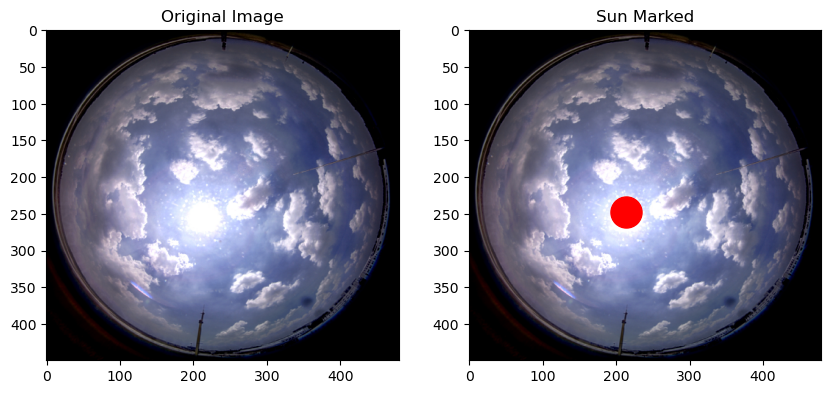

In [6]:
import numpy as np 
import cv2
from scipy import ndimage
import scipy.misc
import matplotlib.pyplot as plt

### Color Segmentation Approach
def sun_position(im, threshold_value):

	# Rotate to correct positions if required
	lx, ly, _ = im.shape
	if lx>ly:
		print ('Rotating')
		im = ndimage.rotate(im, -90)

	# Finding the centroid of sun position polygon
	red = im[:,:,2]
	green = im[:,:,1]
	blue = im[:,:,0]
	all_coord = np.where( red > threshold_value )
	all_coord = np.asarray(all_coord)
	length = np.shape(all_coord)[1]
	sum_x = np.sum(all_coord[0,:])
	sum_y = np.sum(all_coord[1,:])
			
	if (sum_x == 0 or sum_y == 0):
		centroid_x = np.nan
		centroid_y = np.nan
		print ('Sun is not visible in this image')
	else:
		centroid_x = int(sum_x/length)
		centroid_y = int(sum_y/length)
		print ('Sun\'s location in the image is [', str(centroid_x), ',', str(centroid_y), ']')


	return (centroid_x, centroid_y)

# image_location = './class_cloud/6/2021_11_17__11_00_07_HDR.jpg'
# image_location = './1672928411543.jpg'
# image_location = '../cloud_images/original2/2021_11_21__15_00_08_crop2.jpg'
image_location = '../WSISEG-Database/whole sky images/ASC100-1006_052'

im = cv2.imread(image_location)
threshold_value = 245

# This is the main component that performs the computation for sun position in the image. 
(centroid_x,centroid_y) = sun_position(im, threshold_value)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 10))
ax1.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
ax1.title.set_text('Original Image')
ax2.imshow(im[:,:, [2,1,0]])
ax2.title.set_text('Sun Marked')
ax2.scatter(x=[centroid_y], y=[centroid_x], c='r', s=500)

# plt.figure(1)
# plt.imshow(im[:,:, [2,1,0]])
# plt.scatter(x=[centroid_y], y=[centroid_x], c='r', s=500)
# plt.show()

print ('Note the reference axis definition')
print ('X value = ', str(centroid_y))
print ('Y value = ', str(centroid_x))
print('Shape of image = ',im.shape)